## Este notebook es encargado de generar un CSV que consolide todas las pruebas y estandarice los valores de cada columna

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import preprocessing
import math
from sklearn.ensemble import RandomForestClassifier

In [3]:
df_juan = pd.read_csv("..//resources//csv//data//biometrics-juan.csv")
df_rocio = pd.read_csv("..//resources//csv//data//biometrics-ro-2021-07-01.csv")
df_matias = pd.read_csv("..//resources//csv//data//biometrics-matias.csv")
df_bren = pd.read_csv("..//resources//csv//data//biometrics-bren.csv")
df_seba = pd.read_csv("..//resources//csv//data//biometrics-seba.csv")

dfs = [df_rocio, df_juan, df_matias, df_bren, df_seba]

In [4]:
def standarize(df):
    df_to_standarize = df.copy()
    
    # remover las mediciones sin estímulo antes de la estandarización, para no afectar la desviación
    filterArousal = df_to_standarize['ArousalMean'] > 0
    filtered1 = df_to_standarize[filterArousal]

    # remover las mediciones para las que el sam no coincidió antes de la estandarización, para no afectar la desviación
    # filterSam = filtered1['MatchesSam'] == True
    # filtered = filtered1[filterSam]
    
    columns_to_standarize = ['HR', 'HRV', 'MicroSiemens']

    scaler = preprocessing.StandardScaler()
    standarized_df = scaler.fit_transform(df_to_standarize[columns_to_standarize])

    standarized_df_with_arousal = np.append(standarized_df, df_to_standarize[['ArousalMean']], axis=1)

    # Convert it to dataframe
    standarized_df_with_arousal = pd.DataFrame(standarized_df_with_arousal, columns=['HR', 'HRV', 'MicroSiemens', 'ArousalMean'])

    return standarized_df_with_arousal

In [5]:
# Se estandariza cada dataframe
standarized_dfs = list(map(standarize, dfs))

# Se los une a todos en un solo dataframe para entrenamiento luego de la estandarización
biometrics_df = pd.concat(standarized_dfs)

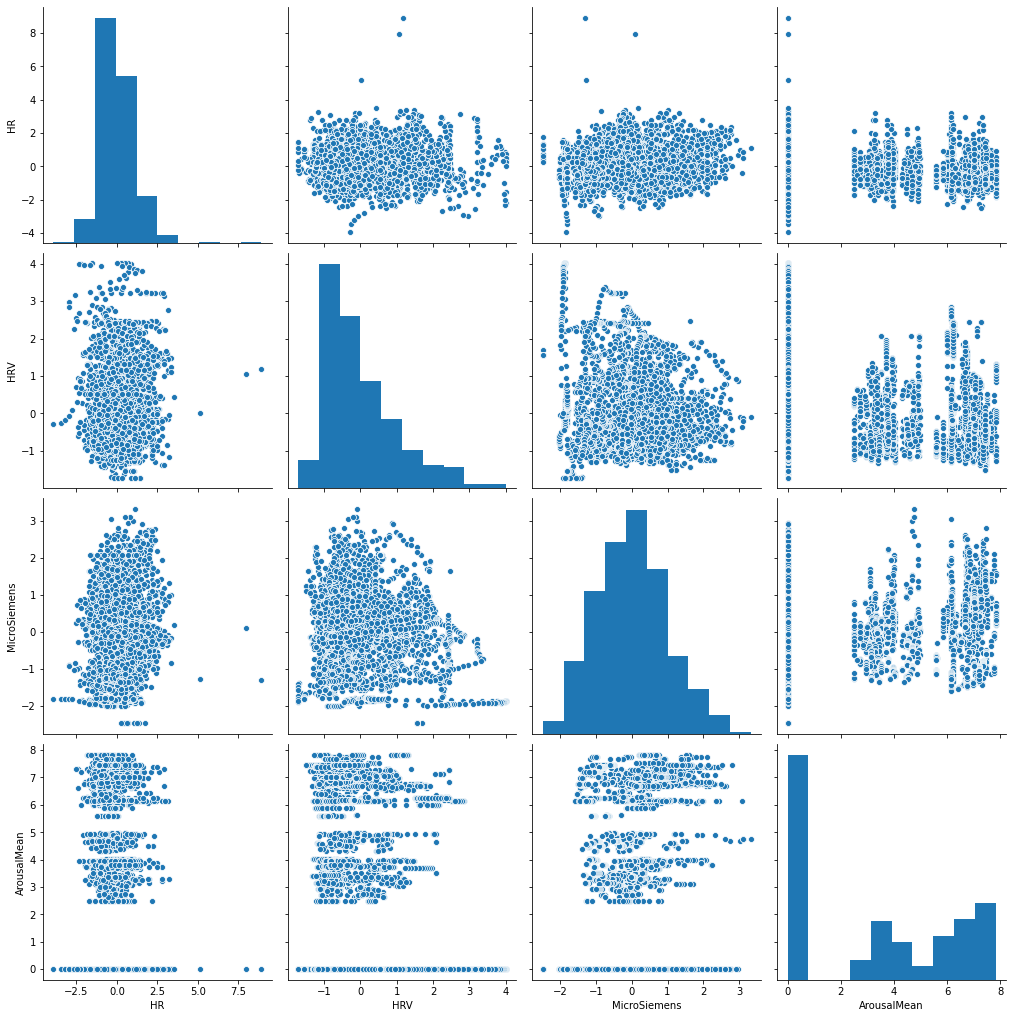

In [6]:
sns.pairplot(biometrics_df, height=3.5);
plt.show()

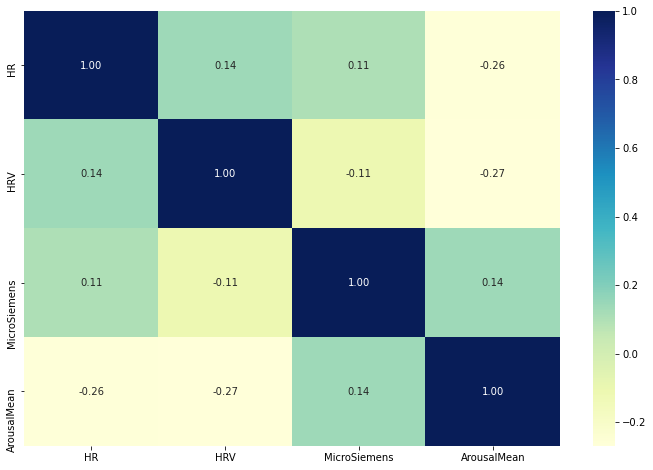

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(biometrics_df.corr(), annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()

In [8]:
biometrics_df.to_csv(r'./1_standarized_biometrics.csv', index = False)